In [1]:
from myImports import *
from myFuncs import explore_nc

In [2]:
## Which cacatoes data ? 
cacatoes_dir_path = "/homedata/fiolleau/RCE/CACATOES/"
explore_nc(cacatoes_dir_path+"cacatoes_rcemip_SAM_RCE_large295_2D.nc")

<xarray.Dataset>
Dimensions:                       (Y: 4, X: 62, time: 26, CondPrecip: 17,
                                   MCS: 150)
Coordinates:
  * time                          (time) timedelta64[ns] 0 days ... 25 days
  * CondPrecip                    (CondPrecip) int16 0 1 2 3 4 ... 25 30 35 40
Dimensions without coordinates: Y, X, MCS
Data variables: (12/41)
    Ygrid                         (Y) float32 ...
    Xgrid                         (X) float32 ...
    DAILYmcs_Pop                  (time, Y, X) float32 ...
    DAILY_OLR                     (time, Y, X) float32 ...
    DAILY_precip                  (time, Y, X) float32 ...
    DAILY_conditionalprecip       (time, CondPrecip, Y, X) float32 ...
    ...                            ...
    INT_gridtimeOccupation_start  (time, MCS, Y, X) float64 ...
    INT_gridtimeOccupation_end    (time, MCS, Y, X) float64 ...
    INT_surfFraction_235K         (time, MCS, Y, X) float32 ...
    INT_surfFraction_220K         (time, MCS, Y, X)

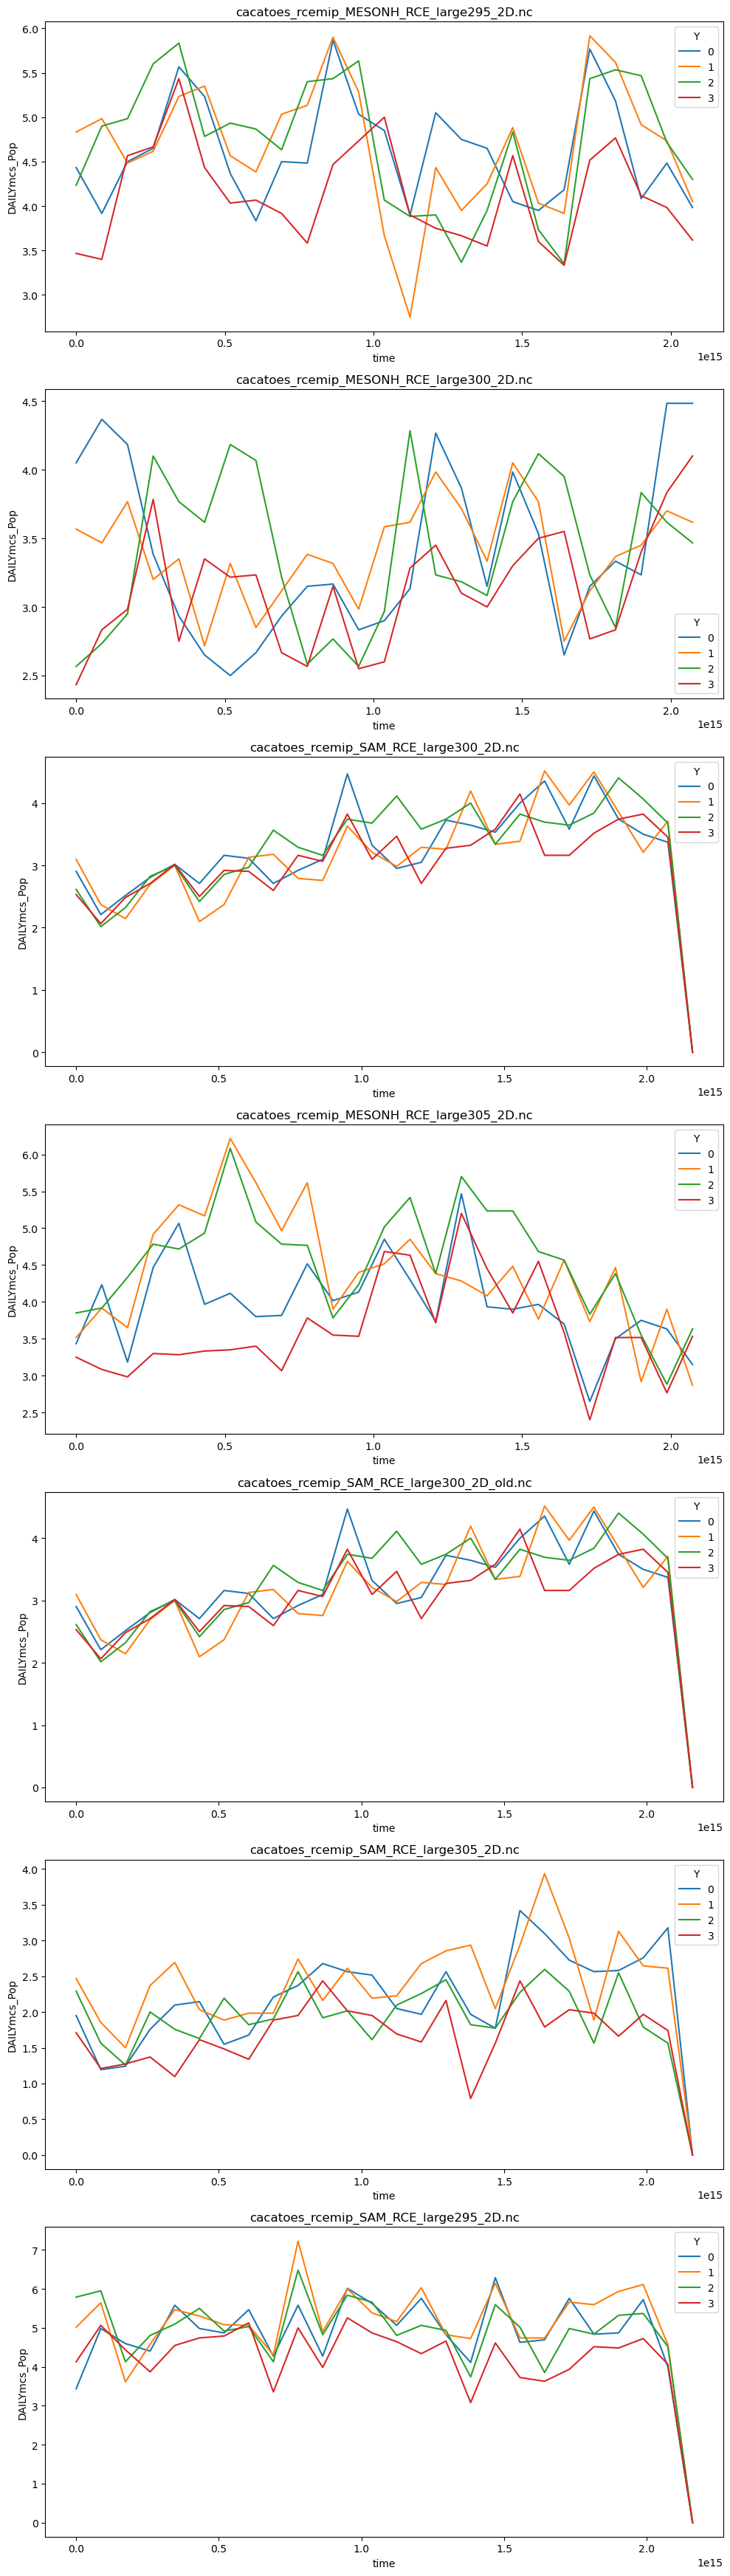

In [8]:
# Get a list of all .nc files in the directory
file_list = [f for f in os.listdir(cacatoes_dir_path) if f.endswith('.nc')]

# Loop over the files and load them into xarray datasets
datasets = []
for file in file_list:
    file_path = os.path.join(cacatoes_dir_path, file)
    ds = xr.open_dataset(file_path)
    datasets.append(ds)

# Plot the variable over the time dimension for each dataset in subplots
num_plots = len(datasets)
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5*num_plots))

for i, ds in enumerate(datasets):
    var_name = "DAILYmcs_Pop"  # replace with the name of the variable you want to plot
    ds[var_name].mean(axis=2).plot.line(x='time', ax=axs[i])
    axs[i].set_title(f"{file_list[i]}")
    axs[i].set_xlabel("time")
    axs[i].set_ylabel(var_name)

plt.tight_layout()
plt.show()